# QEC

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [19]:
M = 200
bias = 1000.0
L = 17
npoints=5

In [20]:
chi_list = [4,8,12,16,20,24,28]


Pfail = []
Pfail_err = []
for chi in chi_list:
    success_list = []
    for n in range(1,npoints+1):
        path = "data/random_XZ_YZ_L"+str(L)+"_bias"+str(bias)+"_M"+str(M)+"_chi"+str(chi)+"_n"+str(n)+".pickle"
        data = pickle.load(open(path,"rb"))
        s  = np.asarray(data["success_list"])
        s  = list(np.reshape(s,[s.shape[1]*s.shape[2]]))
        success_list += s
    success_data = np.asarray(success_list)
    Pfail.append(1 - np.mean(success_data))
    Pfail_err.append(np.std(success_data)/np.sqrt(len(success_data)-1))
    print("%.5f  +- %.2E" % (Pfail[-1],Pfail_err[-1]))

0.63328  +- 1.90E-03
0.51708  +- 1.98E-03
0.48717  +- 1.98E-03
0.46956  +- 1.97E-03
0.46786  +- 1.97E-03
0.46833  +- 1.97E-03
0.46689  +- 1.97E-03


In [94]:
Pfail

[0.26517187499999995, 0.26759374999999996, 0.2644375, 0.26093750000000004]

In [20]:
success_list = np.reshape(success_list,[success_list.shape[0],success_list.shape[1]*success_list.shape[2]])[0,:]
success_list

array([1., 0., 0., ..., 1., 0., 1.])

In [125]:
bias = 0.5

M = 1000
chi = 8

L = 5
path = "data/random_XZ_YZ_L"+str(L)+"_bias"+str(bias)+"_M"+str(M)+"_chi"+str(chi)+".pickle"
data = pickle.load(open(path,"rb"))
error_probability = data["error_probabilities"]
nprobs = len(error_probability)
success_list  = np.asarray(data["success_list"])
success_list = np.reshape(success_list,[success_list.shape[0],success_list.shape[1]*success_list.shape[2]])
Pfail_5 = []
Pfail_err_5 = []
for n in range(nprobs):
    success_data   = success_list[n]
    Pfail_5.append(1 - np.mean(success_data))
    Pfail_err_5.append(np.std(success_data)/np.sqrt(M-1))
    
L = 7
path = "data/random_XZ_YZ_L"+str(L)+"_bias"+str(bias)+"_M"+str(M)+"_chi"+str(chi)+".pickle"
data = pickle.load(open(path,"rb"))
error_probability = data["error_probabilities"]
nprobs = len(error_probability)
success_list  = np.asarray(data["success_list"])
#success_list = np.transpose(success_list,[1,0,2])
success_list = np.reshape(success_list,[success_list.shape[0],success_list.shape[1]*success_list.shape[2]])
Pfail_7 = []
Pfail_err_7 = []
for n in range(nprobs):
    success_data   = success_list[n]
    Pfail_7.append(1 - np.mean(success_data))
    Pfail_err_7.append(np.std(success_data)/np.sqrt(M-1))
    
L = 9
path = "data/random_XZ_YZ_L"+str(L)+"_bias"+str(bias)+"_M"+str(M)+"_chi"+str(chi)+".pickle"
data = pickle.load(open(path,"rb"))
error_probability = data["error_probabilities"]
nprobs = len(error_probability)
success_list  = np.asarray(data["success_list"])
#success_list = np.transpose(success_list,[1,0,2])
success_list = np.reshape(success_list,[success_list.shape[0],success_list.shape[1]*success_list.shape[2]])
Pfail_9 = []
Pfail_err_9 = []
for n in range(nprobs):
    success_data   = success_list[n]
    Pfail_9.append(1 - np.mean(success_data))
    Pfail_err_9.append(np.std(success_data)/np.sqrt(M-1))

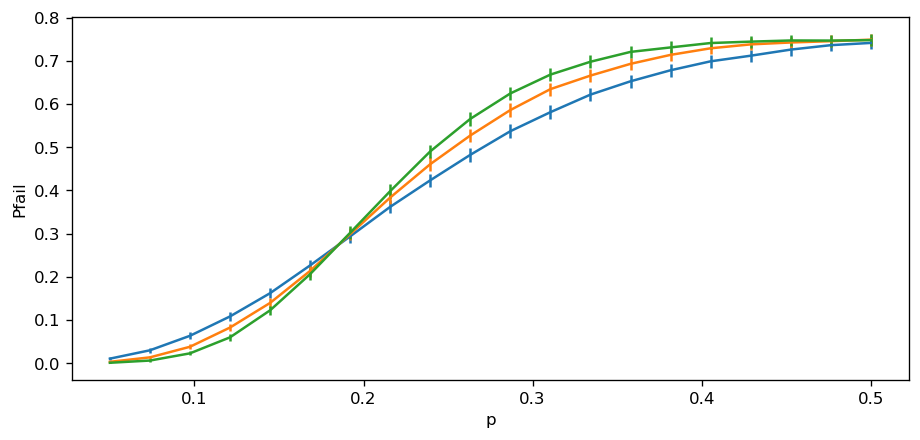

In [126]:
fig = plt.figure(1,figsize=(9,4), dpi=120, facecolor='w', edgecolor='k')

plt.errorbar(error_probability, Pfail_5, Pfail_err_5)
plt.errorbar(error_probability, Pfail_7, Pfail_err_7)
plt.errorbar(error_probability, Pfail_9, Pfail_err_9)
plt.xlabel("p")
plt.ylabel("Pfail")
plt.show()